# Round 7-2: Network thresholding and spanning trees: the case of US air traffic
In this exercise, we will get familiar with different approaches to thresholding networks, and also learn how they can be used for efficiently visualizing networks.

Now, you are given a network describing the US Air Traffic between 14th and 23rd December 2008 (Data from http://www.rita.dot.gov/bts/ ). In the network, each node corresponds to an airport and link weights describe the number of flights between the airports during the time period.

The network is given in the file `aggregated_US_air_traffic_network_undir.edg`, and `us_airport_id_info.csv` contains information about names and locations of the airports.

This notebook can be used to complete the assignment. It contains a function for visualizing the air transport network and an example of how to use it. There is NO need to modify this function. You may start your solution after the header "**Begin of the Exercise**" down below. In this exercise, you may also freely use all available `networkx` functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def plot_network_usa(net, xycoords, bg_figname, edges=None, alpha=0.3):
    """
    Plot the network usa.

    Parameters
    ----------
    net : the network to be plotted
    xycoords : dictionary of node_id to coordinates (x,y)
    bg_figname: file name for the background map figure
    edges : list of node index tuples (node_i,node_j),
            if None all network edges are plotted.
    alpha : float between 0 and 1, describing the level of
            transparency
    """
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 0.9])
    # ([0, 0, 1, 1])
    img = plt.imread(bg_figname)
    axis_extent = (-6674391.856090588, 4922626.076444283,
                   -2028869.260519173, 4658558.416671531)
    ax.imshow(img, extent=axis_extent)
    ax.set_xlim((axis_extent[0], axis_extent[1]))
    ax.set_ylim((axis_extent[2], axis_extent[3]))
    ax.set_axis_off()
    nx.draw_networkx(net,
                     pos=xycoords,
                     with_labels=False,
                     node_color='k',
                     node_size=5,
                     edge_color='r',
                     alpha=alpha,
                     edgelist=edges)
    return fig, ax

## Data
Let us load the data from the right directory. If you run this notebook in your machine, please specify the right directory.

In [3]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'

print('The data directory is %s' % course_data_dir)

csv_path = os.path.join(course_data_dir, 'US_airport_id_info.csv')
network_path = os.path.join(course_data_dir, 'aggregated_US_air_traffic_network_undir.edg')
bg_figname = os.path.join(course_data_dir, 'US_air_bg.png')

The data directory is /coursedata


In [4]:
id_data = np.genfromtxt(csv_path, delimiter=',', dtype=None, names=True, encoding='utf8') 
xycoords = {}
for row in id_data:
    xycoords[str(row['id'])] = (row['xcoordviz'], row['ycoordviz'])
net = nx.read_weighted_edgelist(network_path)

# Begin of the exercise

Write your code here to calculate the required metrics, compute the thresholded network, maximal and minimal spanning tree, and visualize the networks. Remember you can use the networkx functions.


### a. Basic properties
When facing a new network, it is always good to first get some idea, how the network is like. Thus, compute and list the following basic network properties:
- Number of network nodes N and density D
- Network diameter d
- Average clustering coefficient C

**Hints**:
- To make sure that the network is loaded correctly, calculate the number of links $L$. You should be getting $L = 2088$.
- For the clustering coefficient, consider the undirected and unweighted version of the network, where two airports are linked if there is a flight between them in either direction.

In [22]:
#Your solution here
print("Number of nodes in network",nx.number_of_edges(net))
print("Density of the network",nx.density(net))
print("Diameter of the network",nx.diameter(net))
print("Average clustering coefficient of the network",nx.average_clustering(net))
# YOUR CODE HERE
#raise NotImplementedError()

Number of nodes in network 2088
Density of the network 0.05384079832907867
Diameter of the network 4
Average clustering coefficient of the network 0.6465167472774311


### b. Visualization
Visualize the full network with all links on top of the map of USA. The resulting figure is somewhat messy due to the large number of visible links.

**Hint**: use `fig.savefig('figure_name.pdf')` to save your figures in the notebook folder. 

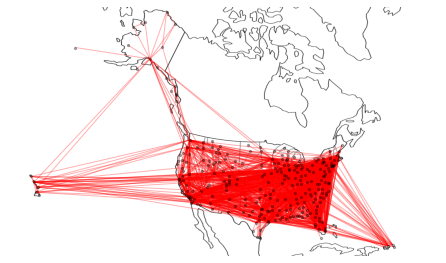

In [25]:
#Your solution here
fig,_ =plot_network_usa(net,xycoords,bg_figname,net.edges())
fig.savefig('usairport.pdf')
# YOUR CODE HERE
#raise NotImplementedError()

### c. Maximal and minimal spanning tree (MST)
In order to reduce the number of plotted links, compute both the maximal and minimal spanning tree (MST) of the network and visualize them. Then, answer following question:
- If you would like to understand the overall organization of the air traffic in the US, would you use the minimal or maximal spanning tree? Why?

**Hint**: For computing minimum spanning trees, use `nx.minimum_spanning_tree`. For computing maximum spanning trees, use `nx.maximum_spanning_tree`.

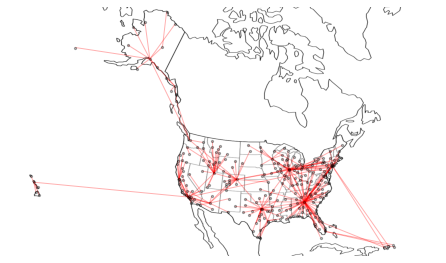

In [28]:
#Your solution here
max_mst=nx.maximum_spanning_tree(net)
min_mst=nx.minimum_spanning_tree(net)
fig,_ =plot_network_usa(net,xycoords,bg_figname,max_mst.edges())
fig.savefig('max_mst.png')
# YOUR CODE HERE
#raise NotImplementedError()

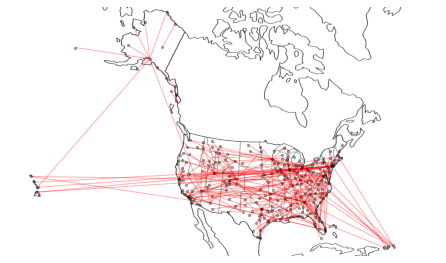

In [29]:
fig,_ =plot_network_usa(net,xycoords,bg_figname,min_mst.edges())
fig.savefig('min_mst.png')

### d. Thresholded networks
Threshold and visualize the network by taking only the strongest $M$ links into account, where $M = N - 1$ is the number of links in the maximal spanning tree. Then, answer following questions:
- How many links does the thresholded network share with the maximal spanning tree?
- Given this number and the visualizations, does simple thresholding yield a similar network as the maximum spanning tree?

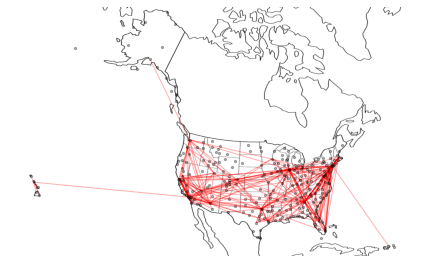

In [38]:
#Your solution here
max_len=len(max_mst.edges())

desc_weight_edges = set([(u,v) for (u,v,w) in sorted(list(net.edges(data=True)), key=lambda edge: edge[2]["weight"], reverse=True)][0:max_len])

c=0
for edge in set(max_mst.edges()):
    for t_edge in desc_weight_edges:
        if sorted(edge)==sorted(t_edge):
            c+=1
fig,_ =plot_network_usa(net,xycoords,bg_figname,desc_weight_edges)
fig.savefig('desc_weight_edges.png')       
# YOUR CODE HERE
#raise NotImplementedError()

In [36]:
print("Edges in Maximal Spanning tree: ",max_len)
print("Edges in Thresholded tree: ",len(desc_weight_edges))
print("Same Edges: ",c)

Edges in Maximal Spanning tree:  278
Edges in Thresholded tree:  278
Same Edges:  97
